In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from scipy.ndimage import rotate as sci_rotate
import pink_utils as pu

In [3]:
som = pu.som('../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_6.bin')

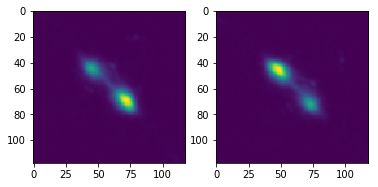

In [57]:
a = som.get_neuron(x=14, y=0, channel=0)
a = pu.neuron(a)

b = som.get_neuron(x=14, y=0, channel=0)
b = pu.neuron(b)

fig, (ax1, ax2) = plt.subplots(1,2)

ax1.imshow(a.transform((0,0)))
ax2.imshow(b.transform((1,np.pi/2*3)))

fig.show()


(118, 118)

-------
(118, 118)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

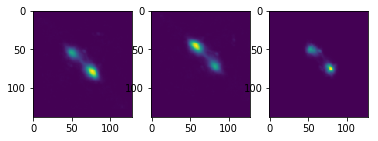

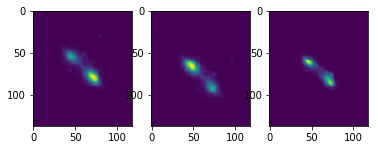

In [58]:
def combine_img(cen_img, img, offset):
    # offset is relative to center pixel of cen_img
    # Dimensions are same as the shape - (y, x)
    cen_y, cen_x = np.array(cen_img.shape) // 2
    print(cen_img.shape)
    
    ny = cen_img.shape[0] + 2*np.abs(offset[0])
    nx = cen_img.shape[1] + 2*np.abs(offset[1])

    cen_img_zeros = np.zeros((ny, nx))
    img_zeros = np.zeros((ny, nx))
    
    slice_y = np.abs(offset[0])
    slice_x = np.abs(offset[1])

    cen_img_zeros[slice_y:slice_y+cen_img.shape[0],
                  slice_x:slice_x+cen_img.shape[1]] = cen_img[:,:]
    
    slice_y += offset[0]
    slice_x += offset[1]
    
    img_zeros[slice_y:slice_y+img.shape[0],
              slice_x:slice_x+img.shape[1]] = img[:,:]
    
    combine = np.prod(np.array((cen_img_zeros, img_zeros)),axis=0)
    
    fig, (ax1, ax2, ax3) = plt.subplots(1,3)
    
    ax1.imshow(cen_img_zeros)
    ax2.imshow(img_zeros)
    ax3.imshow(combine)
    
    fig.show()
    
    return combine
    
combine_img(a.transform((0,0)), b.transform((1,np.pi/2*3)), (-10,5))

print('\n-------')
combine_img(a.transform((0,0)), b.transform((1,np.pi/2*3)), (10,0))

(118, 118)
(318, 128)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

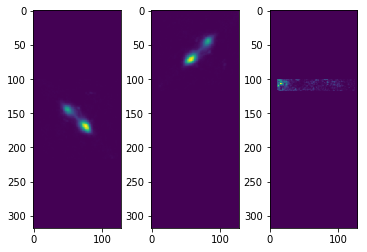

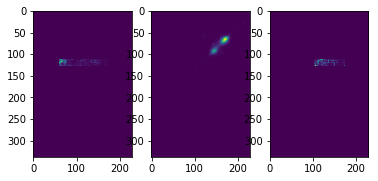

In [59]:
c = combine_img(a.transform((0,0)), b.transform((0, np.pi/2)), (-100,5))

combine_img(c, b.transform((0,np.pi/2*3)), (10,50))